# I. Import of necessary libraries and dataset reading for this project

I'm importing several libraries in Python for a) data manipulation and numerical computation b) Data vizualization and Exploratory Data analysis c) construct pipline and feature engineering d) Clusturing and e) for evaluating the quality of clustering. 

* Pandas is a library for data manipulation and analysis. It provides various functions to read, write, and manipulate data in tabular format.

* NumPy is a library for numerical computing in Python. It provides support for arrays and matrices, along with various mathematical operations.

* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

* Matplotlib is a low-level plotting library in Python. It provides a wide variety of 2D and 3D visualizations, including line charts, scatter plots, and histograms.

* Scipy.stats is a library that provides statistical functions for scientific and engineering applications.

* Sklearn is a machine learning library for Python. It provides various functions for data preprocessing, model selection, and evaluation.

* The KMeans class is part of the sklearn.cluster module in the scikit-learn library. It is used to perform k-means clustering on a given dataset.

* Kneed is a Python library for detecting the optimal number of clusters in k-means clustering.

* DBSCAN is a density-based clustering algorithm in machine learning. It is used to find clusters of data points that are closely packed together.

* NearestNeighbors is a machine learning algorithm for finding k-nearest neighbors in a dataset.

* Silhouette score is a metric for evaluating the quality of clusters in a clustering algorithm. It measures how similar an object is to its own cluster compared to other clusters.A score close to 1 indicates that the object is well-clustered, while a score close to -1 indicates that the object may be misclassified. 

* The Calinski-Harabasz index measures the ratio of between-cluster variance to within-cluster variance, taking into account the number of clusters and the size of each cluster. A higher Calinski-Harabasz index indicates better cluster quality.

In [1]:
# Importing data manipulation and numerical computation libraries
import pandas as pd
import numpy as np
# Importing  Data vizualization and Exploratory Data analysis libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
# Importing  libraries for constructing pipline and feature engineering 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Importing clustering libraries 
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# Importing libraries for evaluating clusters
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

The code below reads the baseline dataset for refugees located in Github using pandas and stores it in a pandas DataFrame object named refugee_df.

In [2]:
# providing the data path
data ='C:/Users/Nael/Desktop/Uganda/Uganda Uthabiti_baseline/ML/refugee_df.csv'
# reading the data csv file and naming the dataframe as df
refugee_df = pd.read_csv(data, encoding='latin-1')    

In [3]:
# Determining the dataset size 
print('Dataset number of rows is', refugee_df.shape[0],'and','Dataset number of variables is',refugee_df.shape[1] )

Dataset number of rows is 541 and Dataset number of variables is 254


In [4]:
# checking  and # getting all the column names of the dataframe
columns_names = list(refugee_df.columns)
#print(columns_names)    # for printing the column name, remove # from this code line      

# II. Exploratory Data Analysis (EDA)

EDA is a critical step in the data analysis process, as it will  allow to understand the structure and characteristics of the data before applying  any machine learning techniques. For each numerical  variable considered (Household size, reduced Coping Strategy Index, Food Consumption Score and Food Expenditure Share) in the project, a  Box plots and distribution plots  were generated. These are important tools for EDA because they will help identify any issues or irregularities in the data that may affect the performance of machine learning algorithms.

Here are  specifically the few reasons why I generated box plots and distribution plots during EDA before running machine K-Mean and DBSCAN algorithms:

1.	Outlier detection: Box plots are an excellent tool for identifying outliers in the data. Outliers are data points that fall far outside the typical range of the data and can skew the results of statistical and machine learning algorithms. By identifying and removing outliers  before running machine learning algorithms, we will improve the accuracy and reliability of our models.

2.	Data normalization: Distribution plots will help to understand the distribution of the data and whether it needs to be normalized before running machine learning algorithms. Normalization is the process of transforming the data so that it has a mean of zero and a standard deviation of one. Normalizing the data will improve the performance of K-Means and DBSCAN machine learning algorithms.

3.	Feature selection: Box plots and distribution plots can help us to identify which features (i.e., variables) in the dataset are most important for predicting the target variable. By selecting only the most important features, we can reduce the dimensionality of the dataset and improve the efficiency and accuracy of machine learning algorithms.

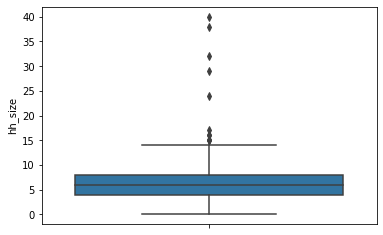

In [5]:
# Box plot of household size 
sns.boxplot(y='hh_size',data=refugee_df)
plt.show()

**Observations:** Looking at the household size, there are ouliers and most likely they are data entry errors. It is unprobable more than 15 people in a household. Therefore, we made the decision to remove row with HH_size > 15


In [6]:
# remove rows where household size  is greater than 15
refugee_df = refugee_df[refugee_df['hh_size'] <= 15]

In [7]:
# dataset size after removal of  household size outliers
refugee_df.shape

(533, 254)

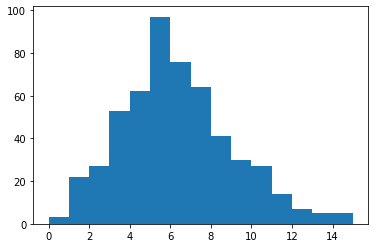

In [8]:
# Plotting the distribution of household size
plt.hist(refugee_df['hh_size'],bins =15)
plt.show()

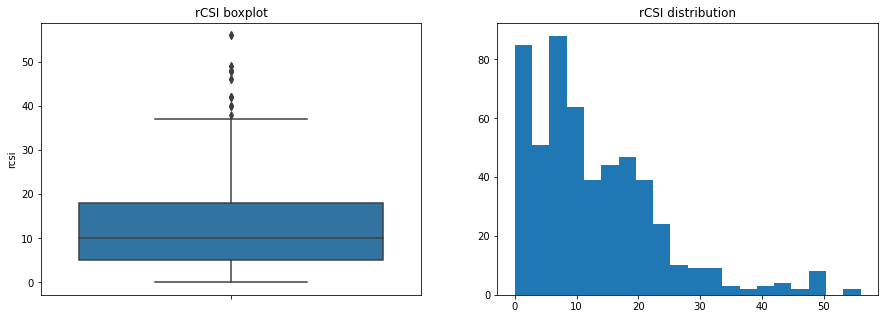

In [9]:
# Coping strategy index distribution and box plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(ax=axes[0], data=refugee_df, y='rcsi').set_title('rCSI boxplot')
n, bins, patches = axes[1].hist(x=refugee_df['rcsi'], bins=20)
axes[1].set_title('rCSI distribution')
plt.show()

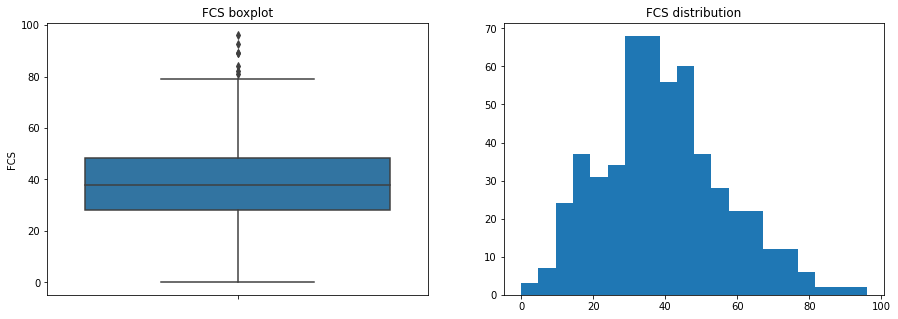

In [10]:
# Food Consumption Score  distribution and box plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(ax=axes[0], data=refugee_df, y='FCS').set_title('FCS boxplot')
n, bins, patches = axes[1].hist(x=refugee_df['FCS'], bins=20)
axes[1].set_title('FCS distribution')
plt.show()

In [11]:
# Creation of a column/variable for number of income sources
refugee_df['num_source_income'] = refugee_df['sources_food_income_Farming_crop_production_sales'] + refugee_df['sources_food_income_Livestock_fattening_sales'] + refugee_df['sources_food_income_Agricultural_labor'] + refugee_df['sources_food_income_Non_agricultural_labor'] + refugee_df['sources_food_income_Petty_trade ']  + refugee_df['sources_food_income_Other_selfemployment_own business_ agricultural']+ refugee_df['sources_food_income_Other_selfemployment_own business _non-agricultural']+ refugee_df['sources_food/income_Rental'] + refugee_df['sources_food_income_Remittances']  + refugee_df['sources_food_income_Gifts_inheritance'] + refugee_df['sources_food_income_Safety net food_cash assistance']

In [12]:
# Getting the discriptive Statistic of number of source of income
refugee_df['num_source_income'].describe()

count    533.000000
mean       1.611632
std        0.797798
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: num_source_income, dtype: float64

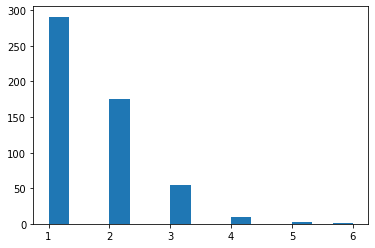

In [13]:
# Plotting the distribution of number of income source
plt.hist(refugee_df['num_source_income'],bins =15)
plt.show()

**Creation of a column/variable for Household Food Expenditure Share**

75% of income on food are considered very vulnerable and consequently food insecure, whereas people spending 65-75% are considered to have high food insecurity; those spending 50-65% have medium food insecurity; and those that spend less than 50% of their income on food are considered to have lower levels of food insecurity.

Documentation on this variable can be found at : 

https://inddex.nutrition.tufts.edu/data4diets/indicator/household-food-expenditure-share

https://docs.wfp.org/api/documents/WFP-0000134704/download/

In [14]:
# Creation of Food Expenditure Share column/variable called FES
refugee_df['exp_tot'] = refugee_df['spend_food']+refugee_df['spend_cooking']+ refugee_df['spend_energy_lighting?'] + refugee_df['spend_health'] +refugee_df["spend_education"] + refugee_df["spend_others"]
refugee_df['FES'] = ((refugee_df['spend_food']+ refugee_df['spend_cooking']) /refugee_df['exp_tot']) * 100

In [15]:
# checking the number of missing values for FES
num_missing_FES = refugee_df['FES'].isnull().sum()
print(num_missing_FES)

1


In [16]:
# remove rows with missing values in FES column
refugee_df = refugee_df.dropna(subset=['FES'])

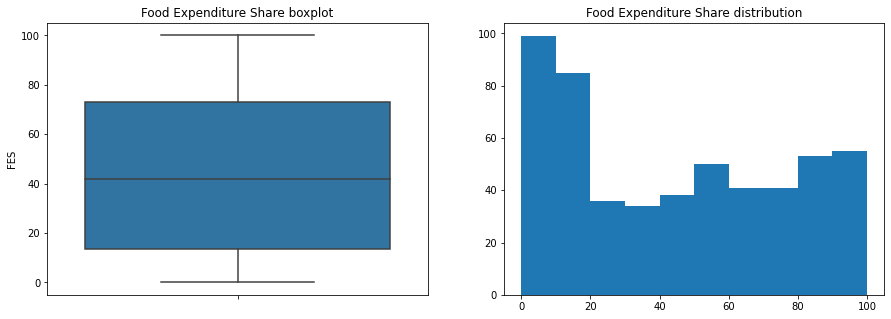

In [17]:
# FES  distribution and box plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(ax=axes[0], data=refugee_df, y='FES').set_title('Food Expenditure Share boxplot')
n, bins, patches = axes[1].hist(x=refugee_df['FES'], bins=10)
axes[1].set_title('Food Expenditure Share distribution')
plt.show()

In [18]:
# descriptive statistics of Food security outcome indicators and other numerical variable  
refugee_df[['rcsi','FCS','FES','hh_size' ]].describe()

,rcsi,FCS,FES,hh_size
count,532.000000,532.000000,532.000000,532.000000
mean,12.684211,39.305451,44.684457,5.840226
std,10.526887,17.209007,32.419944,2.757431
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,27.875000,13.652351,4.000000
50%,10.000000,38.000000,41.689947,6.000000
75%,18.000000,48.500000,72.917212,7.000000
max,56.000000,96.000000,100.000000,15.000000


As a second step of the EDA, a correlation heatmap was created for graphically get a correlation matrix, which is a table showing the correlation coefficients between variables in a dataset. The heatmap uses a color-coded system to represent the correlation strength between each pair of variables. Correlation values close to 1 indicate a strong positive correlation, while values close to -1 indicate a strong negative correlation. Values close to 0 indicate no or weak correlation.

A correlation heatmap is essential for exploratory data analysis before running machine learning because it will help identify significant relationships between variables . By examining the heatmap, I can quickly see which variables in this project are highly correlated with each other, which may indicate redundancy or multicollinearity in the data. This will guide feature selection and preprocessing steps in the machine learning pipeline.

Furthermore, examining the correlation matrix can help to identify potential confounding variables, which may impact the relationship between the predictor variables and the target variable. It can also help to identify any outliers or anomalies in the data.

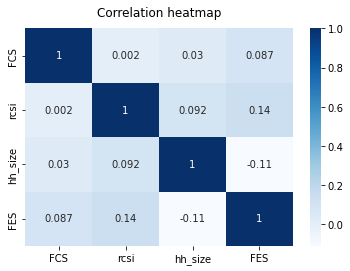

In [19]:
# Plotting the heat map correlation 
heatmap= sns.heatmap(refugee_df[['FCS','rcsi','hh_size','FES']].corr(),cmap = 'Blues', annot = True)  
heatmap.set_title('Correlation heatmap', pad =12)
plt.show()

The codes below will provide the pie chart for which the baseline assessed such as if the individual received fiancial services, belong to a saving groups, receiving business training and received investement opportunities. 

Then a mean difference test was conducted. T-test is a statistical test used to determine if there is a significant difference between the means of two or more groups. It is an important step in exploratory data analysis (EDA) because it can help to identify differences between groups or subgroups in the dataset that may be relevant for machine learning.

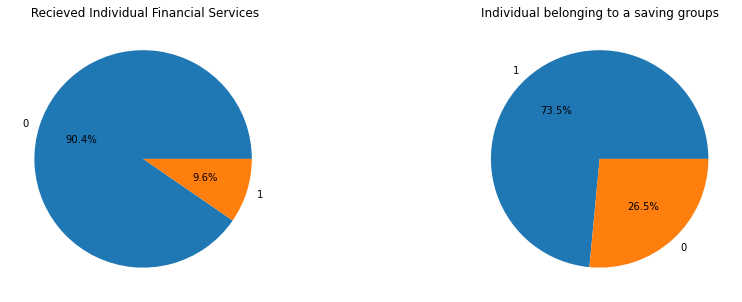

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# first plot 
count_individual_financial = refugee_df['service_Individual_financial'].value_counts()
plt.subplot(1,2,1)
plt.pie(count_individual_financial, labels=count_individual_financial.index,autopct='%1.1f%%')
plt.title(' Recieved Individual Financial Services')

# second plot
count_savingG_member = refugee_df['groupmember_Savings groups '].value_counts()
plt.subplot(1,2,2)
plt.pie(count_savingG_member, labels=count_savingG_member.index,autopct='%1.1f%%')
plt.title('Individual belonging to a saving groups')

plt.show()

C:\Users\Nael\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Nael\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


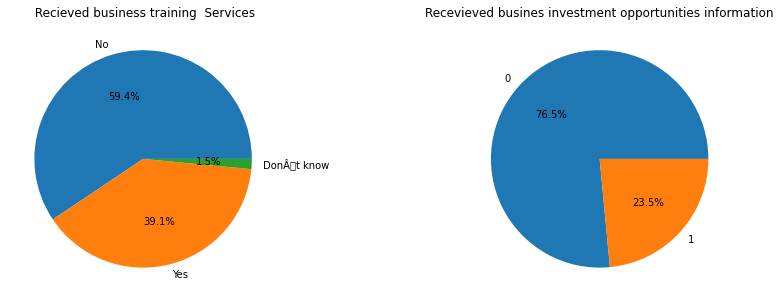

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# 1) first plot
count_BT =refugee_df['received_business_training']. value_counts()
plt.subplot(1,2,1)
plt.pie(count_BT, labels= count_BT.index,autopct='%1.1f%%')
plt.title(' Recieved business training  Services')

# second plot
count_info_B =refugee_df['R701_Information_Business_investment_opportunities']. value_counts()
plt.subplot(1,2,2)
plt.pie(count_info_B, labels= count_info_B.index,autopct='%1.1f%%')
plt.title('Recevieved busines investment opportunities information')

plt.show()

### 2.a Mean difference analysis

Mean difference on group member of saving groups

In [22]:
# Mean of FCS by group saving status 
mean_FCS_saving = refugee_df.groupby('groupmember_Savings groups ')['FCS'].mean()
# print the result
print(mean_FCS_saving)

groupmember_Savings groups 
0    38.890071
1    39.455243
Name: FCS, dtype: float64


In [23]:
# Mean of rCSI group saving status 
mean_rcsi_saving = refugee_df.groupby('groupmember_Savings groups ')['rcsi'].mean()
# print the result
print(mean_rcsi_saving)

groupmember_Savings groups 
0    13.765957
1    12.294118
Name: rcsi, dtype: float64


In [24]:
# mean difference test for rCSI for groupe saving status  

# separate the data by saving groups belongings
saving_yes = refugee_df[refugee_df['groupmember_Savings groups '] == 1]['FCS']
saving_no = refugee_df[refugee_df['groupmember_Savings groups '] == 0]['FCS']

# perform a t-test
t_stat, p_value = ttest_ind(saving_yes, saving_no)

# print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)


t-statistic: 0.3340437566956702
p-value: 0.7384786721165839


In [25]:
# mean difference test for FCS for groupe saving status  

# separate the data by saving groups belongings
saving_yes1 = refugee_df[refugee_df['groupmember_Savings groups '] == 1]['rcsi']
saving_no1 = refugee_df[refugee_df['groupmember_Savings groups '] == 0]['rcsi']

# perform a t-test
t_stat, p_value = ttest_ind(saving_yes1, saving_no1)

# print the results
print('t-statistic1:', t_stat)
print('p-value1:', p_value)

t-statistic1: -1.4246999841379386
p-value1: 0.1548324995330682


In [26]:
# Mean of FES by group saving status 
mean_FES_saving = refugee_df.groupby('groupmember_Savings groups ')['FES'].mean()
# print the result
print(mean_FES_saving)

groupmember_Savings groups 
0    48.450118
1    43.326507
Name: FES, dtype: float64


In [27]:
# separate the data by saving groups belongings
saving_yes2 = refugee_df[refugee_df['groupmember_Savings groups '] == 1]['FES']
saving_no2 = refugee_df[refugee_df['groupmember_Savings groups '] == 0]['FES']

# perform a t-test
t_stat, p_value = ttest_ind(saving_yes2, saving_no2)

# print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -1.611230582876573
p-value: 0.10772480650256193


 A small p-value (less than 0.05) indicates that the means are statistically different.
 

# III. Clustering analysis using only FCS and rCSI indicators

In [28]:
# checking one more time for no missing value
checking_missing = refugee_df[['FCS','rcsi','age1','hh_size']].isna().sum()
print (checking_missing)

FCS        0
rcsi       0
age1       0
hh_size    0
dtype: int64


### Features engineering for refugees attributes

The codes below  select the columns FCS and rcsi from the refugee_df dataframe using double square brackets, and converts them into a numpy array using.

The resulting x variable will be a numpy array with two columns (FCS and rcsi) and as many rows as the refugee_df dataframe. This numpy array will  be used as input to machine learning models or further data analysis. Note that it assumes that numpy library is imported using import numpy as np statement earlier in the code.

In [29]:
# Selecting features and converting into numpy array
x = np.asarray(refugee_df[['FCS','rcsi']])

The EDA showed that the variable are not on the same scale therefore and it is a must for all the variable in this projects to be in scale.Scaling data before running machine learning algorithms is important for several reasons:

* Avoiding biased results: Different features in a dataset may have different scales and ranges. If these features are not scaled, some algorithms may be biased towards features with larger scales and ignore those with smaller scales. This can lead to inaccurate or biased results.

* Improving algorithm performance: Many machine learning algorithms are based on distance calculations, such as K-nearest neighbors or clustering algorithms. When data is not scaled, features with larger scales will have a greater impact on the distance calculations, leading to less accurate results.

* Faster convergence: Scaling data can help improve the convergence rate of some machine learning algorithms. By scaling data, the optimization algorithm can converge more quickly and accurately.

* Reducing numerical instability: In some cases, machine learning algorithms may be numerically unstable when working with unscaled data. Scaling the data can help reduce the likelihood of numerical instability and improve the overall stability of the algorithm.

The codes below  create an instance of the StandardScaler class from the sklearn.preprocessing module.The StandardScaler class is used to standardize features by removing the mean and scaling to unit variance. This is a common pre-processing step in machine learning, as it can improve the performance of many algorithms, especially those based on distance measurements.

After creating an instance of the StandardScaler class, it can be used to transform the input data x by calling the fit_transform() method on it. This will compute the mean and standard deviation of each feature, and use them to transform the data to have zero mean and unit variance.The resulting transformed data can then be used as input to machine learning models.

In [30]:
scaler = StandardScaler()

In [31]:
x = scaler.fit(x).transform(x) # normalizing

In [32]:
x[0:2] # checking normalization for the firt two rows is done

array([[-0.22133948,  0.69561639],
       [ 0.0403976 ,  1.07595341]])

### Computing inertia and determination of  optimum number of clusters

The code below  creates a variable inertia which is an empty list that will store the inertia for each value of K, where K is the number of clusters used in K-Means algorithm. Then, a for loop is used to iterate over a range of K values from 1 to 10. Within the loop, an instance of K-Means algorithm is created with the specified number of clusters, fitted to the input data x, and the inertia is computed and appended to the inertia list.

After the loop, a list of numbers from 1 to 10 is created and used as the x-axis for plotting. The plt.style.use function is used to set the style of the plot to "ggplot". The plt.xticks and plt.yticks functions are used to set the font size of the tick labels. The plt.xlabel and plt.ylabel functions are used to set the x-axis and y-axis labels, respectively. Finally, sns.lineplot is used to plot the number of clusters on the x-axis and the corresponding inertia on the y-axis, and plt.show is used to display the plot.

The resulting plot will show the elbow curve, which is used to determine the optimal number of clusters for K-Means algorithm. The elbow curve will help to identify the point where the inertia starts to flatten out, indicating that additional clusters will not significantly improve the performance of the algorithm.

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

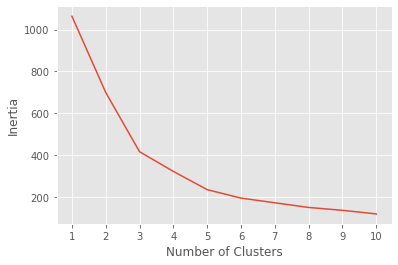

In [33]:
# Creating a variable which is an empty list that store the inertia for each K 
inertia = []

#  for loop 
for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    cluster = KMeans (n_clusters = a)  #  instance of K-Means
    cluster.fit(x)                     #  Fitting the instance of K-Means to selected features
    inertia.append (cluster.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10
k = list(range(1,11))

# Plotting number of clusters and the computed inertias
plt.style.use("ggplot")
plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
sns.lineplot(x = k , y =inertia)
plt.show()     

In [34]:
# printing the list of inertia values
print (inertia)

[1064.0, 699.0183988633066, 415.4564589108363, 321.28672034177856, 234.00216516976866, 193.52138331400963, 171.11518851481384, 148.73821822397335, 135.0566277164357, 117.82031053239571]


In [35]:
# locating the elbow point
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
opt = kl.elbow
print('The optimun number of cluster is' , opt)

The optimun number of cluster is 3


### K-Means with the optimum number of K and assigning each data point to a cluster for refugees

In [36]:
# K-Means with optimun K 
clustering = KMeans (n_clusters = opt)
clustering.fit(x)

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [37]:
# assigning  each data point (row) to a cluster

refugee_df['cluster'] = clustering.labels_


In [38]:
# determining silhouette score for K-Means with optimun cluster 

kmeans_silhouette1 = silhouette_score(x, clustering.labels_)
kmeans_silhouette1

0.4020126608877725

In [39]:
# determining calinski_harabasz_score for K-Means with optimun cluster

In [40]:
kmeans_chs1 = calinski_harabasz_score(x, clustering.labels_)
print(kmeans_chs1)

412.8946919438771


### Getting basic statisctic descriptive for the features in each cluster

In [41]:
# creating a subset for each cluster
refugee_df_cluster0 = refugee_df[refugee_df['cluster'] == 0]
refugee_df_cluster1 = refugee_df[refugee_df['cluster'] == 1]
refugee_df_cluster2 = refugee_df[refugee_df['cluster'] == 2]

In [42]:
# descriptive statistic for cluster 0
refugee_df_cluster0[['FCS','rcsi','hh_size','num_source_income']].describe()

,FCS,rcsi,hh_size,num_source_income
count,127.000000,127.000000,127.000000,127.000000
mean,40.799213,26.952756,6.401575,1.614173
std,9.038555,9.470806,3.016515,0.816956
min,11.000000,16.000000,1.000000,1.000000
25%,35.500000,20.500000,5.000000,1.000000
50%,42.500000,24.000000,6.000000,1.000000
75%,46.250000,30.500000,8.000000,2.000000
max,64.500000,56.000000,15.000000,5.000000


In [43]:
# descriptive statistic for cluster 1
refugee_df_cluster1[['FCS','rcsi','hh_size','num_source_income']].describe()

,FCS,rcsi,hh_size,num_source_income
count,145.00000,145.000000,145.000000,145.000000
mean,59.92069,7.689655,5.724138,1.793103
std,11.74271,5.904938,2.846740,0.971086
min,44.00000,0.000000,0.000000,1.000000
25%,49.50000,3.000000,4.000000,1.000000
50%,59.00000,7.000000,5.000000,2.000000
75%,67.00000,12.000000,7.000000,2.000000
max,96.00000,26.000000,15.000000,6.000000


In [44]:
# descriptive statistic for cluster 2
refugee_df_cluster2[['FCS','rcsi','hh_size','num_source_income']].describe()

,FCS,rcsi,hh_size,num_source_income
count,260.000000,260.000000,260.000000,260.000000
mean,27.078846,8.500000,5.630769,1.507692
std,10.082983,5.727061,2.539688,0.654608
min,0.000000,0.000000,0.000000,1.000000
25%,18.375000,4.000000,4.000000,1.000000
50%,29.500000,8.000000,5.000000,1.000000
75%,35.500000,13.000000,7.000000,2.000000
max,43.000000,23.000000,14.000000,4.000000


### Vizualizing the scatterplots and the clusters (only for selection of two features)

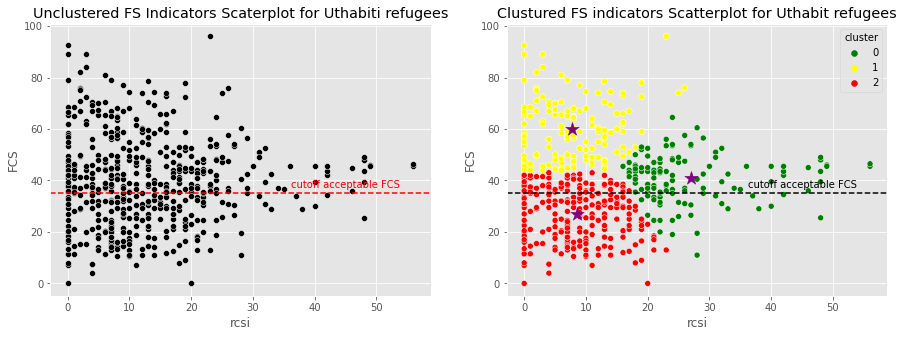

In [45]:
# creating the frame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# first scatter plot
sns.scatterplot(ax=axes[0], data=refugee_df, x='rcsi', y='FCS',color = 'black').set_title('Unclustered FS Indicators Scaterplot for Uthabiti refugees')
axes[0].axhline(y=35, color='red',linestyle= '--') # Add the horizontal line for FCS >35 acceptable 
axes[0].text(45, 38.5, 'cutoff acceptable FCS', color='red', fontsize=10, va='center', ha='center') # Add text above the line
#second scatter plot
custom_palette = {0: "green", 1: "yellow", 2:"red"}
sns.scatterplot(ax=axes[1], data=refugee_df, x='rcsi', y='FCS',hue='cluster',palette=custom_palette).set_title("Clustured FS indicators Scatterplot for Uthabit refugees")
axes[1].axhline(y=35, color='black',linestyle= '--') # Add the horizontal line for FCS >35 acceptable
axes[1].text(45, 38.5, 'cutoff acceptable FCS', color='black', fontsize=10, va='center', ha='center') # Add text above the line
# Add star markers for the center of each cluster
stars = [(7.69, 59.92), (8.5, 27.08), (26.98, 40.87)]
colors = ['purple', 'purple', 'purple']
for i in range(len(stars)):
    x_star, y_star = stars[i]
    color_star = colors[i]
    axes[1].scatter(x_star, y_star, marker='*', s=200, color=color_star) # Add the star marker to the specific point

# Display the plots
plt.show()

In [46]:
# DBSCAN

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [48]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

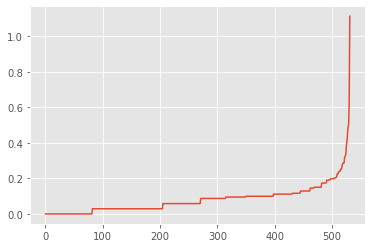

In [49]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [50]:
db = DBSCAN(eps =0.3, min_samples =3)    
db =db.fit(x)


In [51]:
# assigning  each data point (row) to a cluster

refugee_df['cluster_db'] = db.labels_


In [52]:
refugee_df['cluster_db'].unique()

array([ 0, -1,  1,  2,  3,  4], dtype=int64)

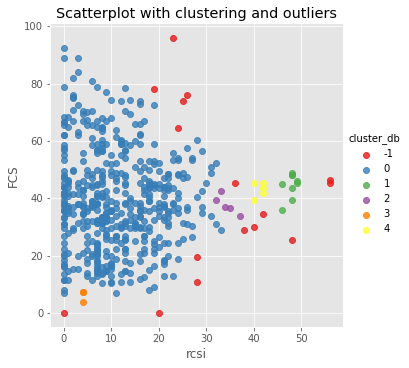

In [53]:
sns.lmplot( data=refugee_df, x='rcsi', y='FCS', hue='cluster_db', fit_reg = False, palette="Set1")
plt.title("Scatterplot with clustering and outliers")
plt.show()

In [54]:
# determining silhouette score for DBSCAN  with optimun hyperparameters
dbscan_silhoutte1 = silhouette_score(x, db.labels_)
dbscan_silhoutte1

0.06780975436417389

In [55]:
# determining calinsky harabasz score for DBSCAN with optimun hyperparameters
dbscan_chs1 = calinski_harabasz_score(x, db.labels_)
print(dbscan_chs1)

30.406073396745025


# IV. Clustering analysis using FCS,rCSI, FES

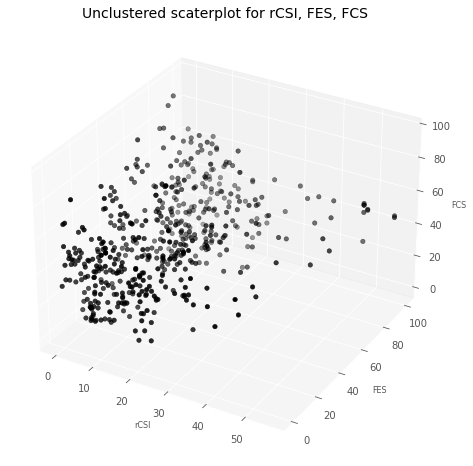

In [56]:
# Create a three-dimensional scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(refugee_df['rcsi'], refugee_df['FES'], refugee_df['FCS'], c='black')

# Set the labels and title of the plot
ax.set_xlabel('rCSI',fontsize =8)
ax.set_ylabel('FES',fontsize =8)
ax.set_zlabel('FCS',fontsize =8)
ax.set_title('Unclustered scaterplot for rCSI, FES, FCS', fontsize =14)
ax.set_facecolor('white')  # set the background color to light gray

# Display the plot
plt.show()

In [57]:
# Define the preprocessing steps for the numerical variables

num_features3 = ['rcsi', 'FCS','FES']
num_transformer3 = StandardScaler()

preprocessor3 = ColumnTransformer(
    transformers=[ ('num', num_transformer3, num_features3)])  
 

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

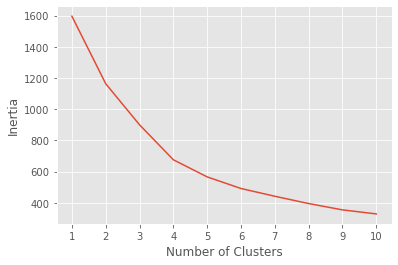

In [58]:
# Creating a variable which is an empty list that store the inertia for each K 
inertia3 = []

#  for loop 
for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    clustering3 = KMeans (n_clusters = a)  #  instance of K-Means
    clf3 = Pipeline(steps=[('preprocessor', preprocessor3), ('kmeans', clustering3)])
    transformed_data = clf3.fit_transform(refugee_df)
    
    inertia3.append (clustering3.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10
k3 = list(range(1,11))

# Plotting number of clusters and the computed inertias
plt.style.use("ggplot")
plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
sns.lineplot(x = k3 , y =inertia3)
plt.show()    

In [59]:
# locating the elbow point
from kneed import KneeLocator
k3 = KneeLocator(range(1, 11), inertia3, curve="convex", direction="decreasing")
opt3 = k3.elbow
print('The optimun number of cluster is' , opt3)

The optimun number of cluster is 4


In [60]:
# K-Means with the optimum number of K =4  (after determining k optimun using pipline)

In [61]:
# Selecting features and converting into numpy array
x1 = np.asarray(refugee_df[['FCS','rcsi','FES']])

In [62]:
x1 = scaler.fit(x1).transform(x1) # normalizing

In [63]:
# K-Means with optimun K 
clustering_opt4 = KMeans (n_clusters = 4)
clustering_opt4.fit(x)

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4)

In [64]:
refugee_df['kmean_opt4_cluster'] = clustering_opt4.labels_

In [65]:
refugee_df['kmean_opt4_cluster']

0      3
1      3
2      3
3      3
4      3
      ..
536    3
537    1
538    2
539    3
540    0
Name: kmean_opt4_cluster, Length: 532, dtype: int32

In [66]:
refugee_df['kmean_opt4_cluster'].value_counts()

2    159
1    155
3    123
0     95
Name: kmean_opt4_cluster, dtype: int64

In [67]:
# determining silhouette score for K-Means with optimun cluster 
kmeans_silhouette2 = silhouette_score(x1, clustering_opt4.labels_)
kmeans_silhouette2

0.20613842469935806

In [68]:
# determining calinsky harabasz score for K-Means with optimun hyperparameters
kmeans_chs2 = calinski_harabasz_score(x, clustering_opt4.labels_)
print(kmeans_chs2)

406.85633405822756


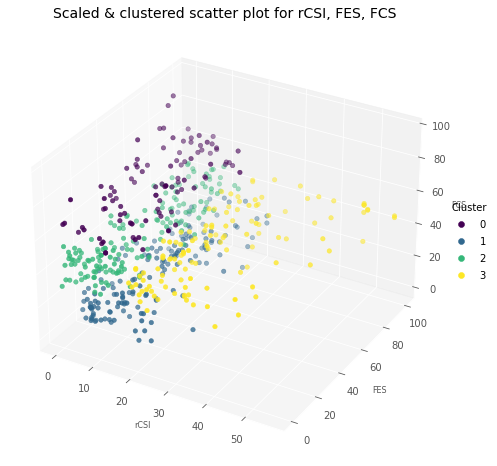

In [69]:
# Create a three-dimensional scatter plot showing the four clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(refugee_df['rcsi'], refugee_df['FES'], refugee_df['FCS'], c=refugee_df['kmean_opt4_cluster'])

# Set the labels and title of the plot
ax.set_xlabel('rCSI', fontsize=8)
ax.set_ylabel('FES', fontsize=8)
ax.set_zlabel('FCS', fontsize=8)
ax.set_title('Scaled & clustered scatter plot for rCSI, FES, FCS', fontsize=14)
ax.set_facecolor('white')

# Add a legend
handles, labels = scatter.legend_elements()
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Cluster', frameon=False)

# Display the plot
plt.show()

In [70]:
# DBSCAN

In [71]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x1)
distances1, indices = neighbors_fit.kneighbors(x1)

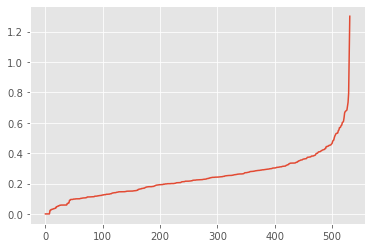

In [72]:
distances1 = np.sort(distances1, axis=0)
distances1 = distances1[:,1]
plt.plot(distances1)
plt.show()

In [73]:
db1 = DBSCAN(eps =0.65, min_samples =4)    
db1 =db1.fit(x1)

In [74]:
# assigning  each data point (row) to a cluster

refugee_df['cluster_db1'] = db1.labels_

In [75]:
refugee_df['cluster_db1'].unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

In [76]:
refugee_df['cluster_db1'].value_counts()

 0    500
-1     18
 3      7
 2      4
 1      3
Name: cluster_db1, dtype: int64

In [77]:
# determining silhouette score for DBSCAN  with optimun hyperparameters
dbscan_silhoutte2 = silhouette_score(x, db1.labels_)
dbscan_silhoutte2

0.29585199573130627

In [78]:
# determining calinsky harabasz score for DBSCAN with optimun hyperparameters
DBSCAN_chs2 = calinski_harabasz_score(x, db1.labels_)
print(DBSCAN_chs2)

33.56045748604042


# V. Clustering with  rCSI, FCAS, FES and adding demographic data 

In [79]:
# Creation of a new separate column calculating number of male adults, female adulte and children in the household 
refugee_df['num_male_adult'] = refugee_df['m 18-29 years'] + refugee_df['m 30-59 years'] + refugee_df['m 60 years and above'] 
refugee_df['num_female_adult'] = refugee_df['f 18-29 years'] + refugee_df['f 30-59 years'] + refugee_df['f 60 years and above']
refugee_df['num_children'] = refugee_df['m 0-17 years'] + refugee_df['f 0-17 years']

In [80]:
# creation of a new  "boolean"  column for each gendered household type 
refugee_df['FM_gender'] = refugee_df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] >= 1) else 0, axis=1)
refugee_df['FNM_gender'] =refugee_df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] >= 1) else 0, axis=1)
refugee_df['MNF_gender'] = refugee_df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] == 0) else 0, axis=1)
refugee_df['CNA_gender'] = refugee_df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] == 0) else 0, axis=1)

In [81]:
# Creation of single column for gendered household type 
refugee_df['gender_HH_type'] = np.where((refugee_df['FM_gender'] == 1) & (refugee_df['FNM_gender'] == 0) & (refugee_df['MNF_gender'] == 0) & (refugee_df['CNA_gender'] == 0), 'F&M',
                   np.where((refugee_df['FM_gender'] == 0) & (refugee_df['FNM_gender'] == 1) & (refugee_df['MNF_gender'] ==0) & (refugee_df['CNA_gender'] == 0), 'FNM',
                   np.where((refugee_df['FM_gender'] == 0) & (refugee_df['FNM_gender'] == 0) & (refugee_df['MNF_gender'] == 1) & (refugee_df['CNA_gender'] == 0), 'MNF', 'CNA')))

In [82]:
# Quick EDA on gendered Household type

In [83]:
refugee_df['gender_HH_type'].value_counts()

F&M    307
FNM    135
MNF     49
CNA     41
Name: gender_HH_type, dtype: int64

In [84]:
FM_df = refugee_df[refugee_df['gender_HH_type']=='F&M']  # creating a subset for F&M (data mining)
FNM_df = refugee_df[refugee_df['gender_HH_type']=='FNM']  # creating a subset for FNM (data mining)

In [85]:
# mean of rci, FCS and FES for F&M household
FM_df[['rcsi', 'FCS','FES']].mean()

rcsi    12.198697
FCS     40.234528
FES     42.646601
dtype: float64

In [86]:
# mean of rci, FCS and FES for FNM household
FNM_df[['rcsi', 'FCS','FES']].mean()

rcsi    14.103704
FCS     38.992593
FES     50.717895
dtype: float64

In [87]:
# T-test for on rcsi on F&M and FNM
TwoTail = ttest_ind(FM_df['rcsi'],FNM_df['rcsi'],equal_var = True)  
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=-1.7120827721504728, pvalue=0.08758602381952842) 
  Note: if p-value less than 0.05 then means are statistically different


In [88]:
# T-test for on FCS on F&M and FNM
TwoTail = ttest_ind(FM_df['FCS'],FNM_df['FCS'],equal_var = True)  
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=0.7190803408706221, pvalue=0.47247313458201146) 
  Note: if p-value less than 0.05 then means are statistically different


In [89]:
# T-test for on FES on F&M and FNM
TwoTail = ttest_ind(FM_df['FES'],FNM_df['FES'],equal_var = True)  
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=-2.38133757717139, pvalue=0.017674330566721314) 
  Note: if p-value less than 0.05 then means are statistically different


In [90]:
# Define the preprocessing steps for categorical and numerical variables
cat_features = ['gender_HH_type']
cat_transformer = OneHotEncoder()
num_features = ['rcsi', 'FCS','hh_size','FES']
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('num', num_transformer, num_features)
    ])

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

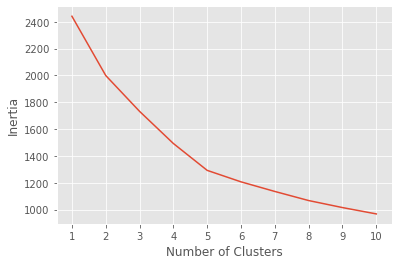

In [91]:
# Creating a variable which is an empty list that store the inertia for each K 
inertia1 = []

#  for loop 
for a in range (1,11):                 #  a for loop that will iterate over a value ranging from 1 to 10 (K)
    clustering1 = KMeans (n_clusters = a)  #  instance of K-Means
    clf1 = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', clustering1)])
    transformed_data = clf1.fit_transform(refugee_df)
    
    inertia1.append (clustering1.inertia_)  #  computing and adding the inertias to the empty list 

# Creating a list of number of clusters from 1 to 10
k1 = list(range(1,11))

# Plotting number of clusters and the computed inertias
plt.style.use("ggplot")
plt.xticks(range(1,11),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
sns.lineplot(x = k1 , y =inertia1)
plt.show()     

In [92]:
# printing the list of inertia values
print (inertia1)

[2440.9097744360897, 1998.988000655514, 1731.9031997345337, 1492.120080739494, 1291.7712920385268, 1206.212647256114, 1134.602622831717, 1066.7985695367267, 1014.4271694834301, 967.1096482372125]


In [93]:
# locating the elbow point
from kneed import KneeLocator
k1 = KneeLocator(range(1, 11), inertia1, curve="convex", direction="decreasing")
opt1 = k1.elbow
print('The optimun number of cluster is' , opt1)

The optimun number of cluster is 5


In [94]:
# Normalize the numerical features
scaler = StandardScaler()
refugee_df[num_features] = scaler.fit_transform(refugee_df[num_features])

# One-hot encode the categorical feature
encoder = OneHotEncoder()
cat_data = encoder.fit_transform(refugee_df[cat_features]).toarray()
cat_cols = encoder.get_feature_names(cat_features)

# Combine the numerical and categorical features
X2 = pd.concat([refugee_df[num_features], pd.DataFrame(cat_data, columns=cat_cols)], axis=1)

# remove rows with NaN values
X2 = X2.dropna()

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
# K-Means with optimun K 
clustering_opt5 = KMeans (n_clusters = 5)
clustering_opt51= clustering_opt5.fit(X2)

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [96]:
# determining silhouette score for Kmeans  with optimun hyperparameters
Kmean_silhoutte3 = silhouette_score(X2, clustering_opt51.labels_)
Kmean_silhoutte3

0.19939120123342238

In [97]:
# determining calinsky harabasz score for K-Means with optimun hyperparameters
kmeans_chs3 = calinski_harabasz_score(X2, clustering_opt51.labels_)
print(kmeans_chs3)

113.71471518992315


In [98]:
# DBSCAN

In [99]:
neighbors2 = NearestNeighbors(n_neighbors=9)
neighbors_fit2 = neighbors2.fit(X2)
distances2, indices2 = neighbors_fit2.kneighbors(X2)

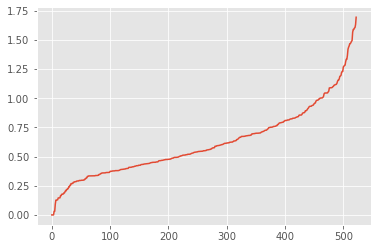

In [100]:
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
plt.plot(distances2)
plt.show()

In [101]:
# Run DBSCAN clustering
dbscan2 = DBSCAN(eps=1.37, min_samples=9)

In [102]:
from collections import Counter

In [103]:
labels = dbscan2.fit_predict(X2)

In [104]:
# Count the unique labels (including noise points)
label_counts = Counter(labels)

In [105]:
# Print the label counts
print(label_counts)

Counter({1: 294, 0: 122, -1: 82, 2: 16, 3: 9})


In [106]:
# determining silhouette score for DBSCAN  with optimun hyperparameters
dbscan_silhoutte3 = silhouette_score(X2, dbscan2.labels_)


In [107]:
dbscan_silhoutte3

-0.011800096059403914

In [108]:
# determining calinsky harabasz score for DBSCAN with optimun hyperparameters
DBSCAN_chs3 = calinski_harabasz_score(X2, dbscan2.labels_)
print(DBSCAN_chs3)

20.71916780292479
